In [109]:
%%HTML
<style>
div.prompt {display:none}
</style>

# TensorFlow, Mini-Batch/Stochastic GradientDescent With Moment

In [96]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import sys
import time

In [108]:
from IPython.display import Image
sys.path.append('/home/pedro/git/ElCuadernillo/ElCuadernillo/20160301_TensorFlowGradientDescentWithMomentum')

In [98]:
import gradient_descent_with_momentum as gdt

## Input
Generamos la muestra de grado 5

Coeficientes:  [ 4.44 -3.67  0.63  0.57]


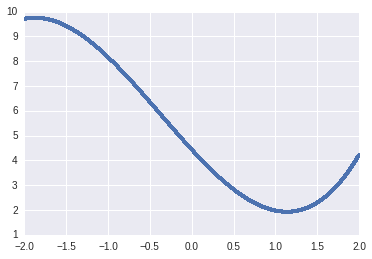

In [99]:
grado=4
tamano=100000
x,y,coeficentes=gdt.generar_muestra(grado,tamano)
print ("Coeficientes: ",coeficentes)
plt.plot(x,y,'.')

## Problema
**Calcular los coeficientes que mejor se ajusten a la muestra sabiendo que es de grado 5**

Generamos la matriz de coeficientes de grado 5

In [100]:
train_x=gdt.generar_matriz_coeficientes(x,grado) # MatrizA
train_y=np.reshape(y,(y.shape[0],-1)) # VectorColumna
learning_rate_inicial=1e-2
activar_sumario=True

### Solucion 1: Por medio *gradient descent*

In [101]:
pesos_gd,ecm_gd,tiempo_gd=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=1,
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.0,
                                                             activar_sumario=activar_sumario,
                                                             prefijo='GD_')

Iteracion 414:
	Pesos: [ 4.28 -2.96  0.71  0.32]
	ecm: 0.12037283927202225
Tiempo de calculo: 6.81791615486145
----------------------


<img src="capturas/gradient_descent.png">

### Solución 2: Por medio *mini-batch=1000  gradient descent*

In [112]:
pesos_mgd,ecm_mgd,tiempo_mgd=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=10000,
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.0,
                                                             activar_sumario=activar_sumario,
                                                             prefijo='mGD_')

Iteracion 363:
	Pesos: [ 4.22 -2.8   0.75  0.24]
	ecm: 0.18072909116744995
Tiempo de calculo: 0.9483833312988281
----------------------


<img src="capturas/mini_batch_gradient_descent.png">

### Solución 3: Por medio *mini-batch=10000  gradient descent With Moment*

In [113]:
pesos_mgdm,ecm_mgdm,tiempo_mgdm=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=10000,
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.9,
                                                             activar_sumario=activar_sumario,
                                                             prefijo='mGDM_')

Iteracion 68:
	Pesos: [ 4.41 -3.56  0.51  0.54]
	ecm: 0.020936276763677597
Tiempo de calculo: 0.43771791458129883
----------------------


<img src="capturas/minibatch_gradient_descent_momentum.png">

### Solución 4: Por medio *mini-batch=1  Stocastict gradient descent With Moment*

In [104]:
pesos_sgdm,ecm_sgdm,tiempo_sgdm=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=len(train_x),
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.9,
                                                             activar_sumario=activar_sumario,
                                                             prefijo='SGDM_')

Iteracion 500:
	Pesos: [  1.09e+08   2.93e+08   8.18e+07   1.94e+09]
	ecm: 6.067617122169651e+17
Iteracion 1000:
	Pesos: [  1.03e+17   2.98e+17  -3.85e+17   6.15e+17]
	ecm: 2.4926682786195253e+34
Iteracion 1032:
	Pesos: [ -1.75e+18   1.04e+18  -1.22e+18   8.62e+17]
	ecm: inf
Tiempo de calculo: 2.351959466934204
----------------------


<img src="capturas/stocastic_gradient_descent_momentum_fail.png">

In [105]:
pesos_sgdm,ecm_sgdm,tiempo_sgdm=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=len(train_x),
                                                             learning_rate_inicial=1e-3, # Disminuimos la tasa de aprendizaje
                                                             momentum=0.9,
                                                             activar_sumario=activar_sumario,
                                                             prefijo='SGDM_2_')

Iteracion 413:
	Pesos: [ 4.29 -3.07  0.67  0.39]
	ecm: 0.0004510260187089443
Tiempo de calculo: 0.953420877456665
----------------------


<img src="capturas/stocastic_gradient_descent_momentum_correct.png">